In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import numpy as np

from made import MADE

In [3]:
import matplotlib.pyplot as plt

In [4]:
from data.toydata import ToyDataset

In [125]:
from flows import create_iaf
from flows import create_maf
from flows import create_paf
from flows import create_realnvp
from flows import create_flows

In [195]:
from train import train_forward
from scores import log_likelihood
from scores import difference_loglik

In [137]:
from structure.ar import AR
from structure.iar import IAR
from structure.twoblock import TwoBlock

from transforms.affine import Affine
from transforms.piecewise import PiecewiseAffine

In [164]:
dim_input = 2
dim_hidden = [10,10,10]
num_trans = 8
perm_type = 'alternate'

In [165]:
dataset = ToyDataset()

In [166]:
transformations = [Affine, Affine, PiecewiseAffine, PiecewiseAffine, Affine, Affine, PiecewiseAffine, PiecewiseAffine]
structures = IAR

In [167]:
#flow = create_iaf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_maf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_paf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_realnvp(dim_input, dim_hidden, num_trans, perm_type)
flow = create_flows(dim_input, dim_hidden, num_trans, perm_type, structure=structures, transformation=transformations)

In [168]:
optimizer = torch.optim.AdamW(flow.parameters(), lr=1e-3)

In [169]:
base_distr = flow.get_base_distr()

In [170]:
loss = train_forward(flow, base_distr, dataset.get_training_data(), optimizer, epochs=200, batch_size=16,print_n=10)

     2.36019


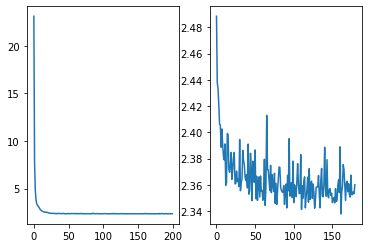

In [186]:
plt.subplot(1,2,1)
plt.plot(loss)

plt.subplot(1,2,2)
plt.plot(loss[20:])

In [172]:
train_data = dataset.get_training_data()

In [173]:
with torch.no_grad():
    sample, log_prob = flow.sample(800)
    sample_last = sample[-1].detach().cpu().numpy()

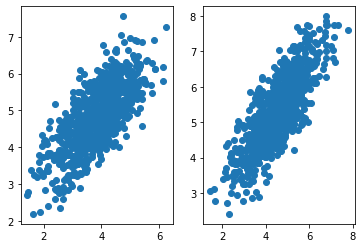

In [174]:
xlims = (np.min(sample_last[:,0], train_data[:,0]), np.max(sample_last[:,0], train_data[:,0]))

plt.subplot(1,2,1)
plt.scatter(sample_last[:,0], sample_last[:,1])
#plt.xlim(-1,9)
#plt.ylim(-1,9)

plt.subplot(1,2,2)
plt.scatter(train_data[:,0], train_data[:,1])
#plt.xlim(-1,9)
#plt.ylim(-1,9)

In [175]:
log_prob_target = dataset.evaluate(sample[-1])
torch.mean(torch.abs(log_prob_target - log_prob))

tensor(0.5707)

In [176]:
with torch.no_grad():
    z_train, log_prob_train = flow.evaluate(train_data)

In [177]:
log_prob_train_target = dataset.evaluate(train_data)

In [178]:
torch.mean(torch.abs(log_prob_train_target-log_prob_train))

tensor(0.1597)

In [179]:
torch.mean(log_prob_train), torch.mean(log_prob_train_target)

(tensor(-2.3538), tensor(-2.3350))

In [180]:
test_data = dataset.get_test_data()

In [181]:
with torch.no_grad():
    z_train, log_prob_test = flow.evaluate(test_data)

In [182]:
log_prob_test_target = dataset.evaluate(test_data)

In [183]:
torch.mean(torch.abs(log_prob_test_target-log_prob_test))

tensor(0.1552)

In [184]:
torch.mean(log_prob_test), torch.mean(log_prob_test_target)

(tensor(-2.3520), tensor(-2.3165))

In [192]:
log_lik, mean = log_likelihood(train_data, flow)

In [199]:
log_lik_diff, mean_diff = difference_loglik(train_data, dataset, flow)

In [200]:
log_lik_diff, mean_diff

([array([1.45400882e-01, 1.43369675e-01, 9.30023193e-02, 1.43473864e-01,
         1.01295233e-01, 4.69283819e-01, 1.26647949e-02, 1.40496731e-01,
         1.24672890e-01, 1.11024857e-01, 8.78466368e-02, 6.97278976e-02,
         4.14303541e-02, 1.97264910e-01, 1.35582447e-01, 3.07187557e-01,
         1.44585729e-01, 4.45376635e-02, 4.87945080e-02, 1.15270615e-02,
         1.38490319e-01, 9.62920189e-02, 1.55988812e-01, 6.74011707e-02,
         1.47434473e-01, 2.01905489e-01, 4.38983440e-02, 2.59735584e-02,
         5.55305481e-02, 1.03122473e-01, 4.48085070e-02, 1.81157112e-01,
         4.42385674e-02, 7.38973618e-02, 1.52365088e-01, 1.24087334e-01,
         1.29630566e-01, 4.60436344e-02, 1.10752225e-01, 7.83646107e-03,
         3.13854694e-01, 5.93769550e-02, 1.67159081e-01, 1.56594992e-01,
         3.17531824e-02, 1.52885079e-01, 3.18724155e-01, 4.05513287e-01,
         7.96215534e-02, 3.57295275e-02, 7.17557669e-02, 2.58541107e-01,
         4.76908684e-03, 1.97057009e-01, 3.83011818